In [1]:
# qualify on member status active only:

In [2]:
# import numpy and pandas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 90)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### upload .png files

In [3]:
br = '\n'
# upload files

df = np.load('data/df.npy')
df_features = np.load('data/features.npy')

In [4]:
print(df_features)

['Household_Key' 'Individual_Key' 'City' 'State_Grouped' 'ZIP5' 'ZIP9'
 'FSV_CMSI_Flag' 'FSV_Credit_Card_Flag' 'FSV_Deposit_Program_Flag'
 'FSV_Home_Equity_Flag' 'FSV_ID_Theft_Flag' 'FSV_Mortgage_Flag'
 'INS_Client_Flag' 'TRV_Globalware_Flag' 'Number_of_Children'
 'Responded_to_Catalog' 'Race' 'Length_Of_Residence' 'Mail_Responder'
 'Home_Owner' 'Income' 'Date_Of_Birth' 'Age' 'Children' 'Education'
 'Dwelling_Type' 'Credit_Ranges' 'Language' 'Gender' 'Branch_Name'
 'County' 'Join_AAA_Date' 'Member_Phone_Type' 'Member_Status'
 'Member_Tenure_Years' 'Member_Type' 'Reinstate_Date' 'Renew_Method' 'ZIP'
 'Mosaic_Household' 'Mosaic_Global_Household' 'kcl_B_IND_MosaicsGrouping'
 'New_Mover_Flag' 'Occupation_Code' 'Occupation_Group'
 'Right_Dwelling_Type' 'Move_Distance' 'Occupant_Type' 'Membership_Level'
 'Roadside_Service' '_memeber_count' '_service_cnt' '_total_cost'
 '_total_products' '_ERS_ENT_Count_Year_1' '_ERS_ENT_Count_Year_2'
 '_ERS_ENT_Count_Year_3' '_ERS_Member_Cost_Year_1'
 '_ERS_

In [5]:
dfv = pd.DataFrame(df, columns=df_features)
dfv.head()

  Household_Key Individual_Key      City State_Grouped  ... _ERS_ENT_Count_Year_3  \
0           875         717785  CRANSTON            RI  ...                     9   
1           969          19943  JOHNSTON            RI  ...                    27   
2          8718         199385  CRANSTON            RI  ...                     0   
3         11524       52285851  JOHNSTON            RI  ...                     1   
4         13422      170834500  COVENTRY            RI  ...                     0   

  _ERS_Member_Cost_Year_1 _ERS_Member_Cost_Year_2 _ERS_Member_Cost_Year_3  
0                  2118.6                  2118.6                 3197.57  
1                       0                  940.85                 2710.71  
2                       0                       0                       0  
3                       0                       0                      53  
4                   58.85                       0                       0  

[5 rows x 60 columns]

In [6]:
dfv['Member_Status'].unique()
df_temp = dfv[dfv['Member_Status'] == 'ACTIVE'].copy()

In [7]:
# # select the columns from above data
# li =  ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 
#        'New_Mover_Flag', 'Education', 'Dwelling_Type', '_total_products']
# li


In [8]:
li = ['Home_Owner', 'Age', 'Length_Of_Residence', \
      'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type', '_total_products']
li

['Home_Owner',
 'Age',
 'Length_Of_Residence',
 'Member_Tenure_Years',
 'New_Mover_Flag',
 'Credit_Ranges',
 'Children',
 'Education',
 'Dwelling_Type',
 '_total_products']

In [9]:
df1= df_temp[li].copy()
df2 = df1.dropna()
subdf = df2.drop_duplicates()
print("subset df shape:", subdf.shape, " orignal df shape:", df.shape )


subset df shape: (1971, 10)  orignal df shape: (3219, 60)


In [10]:
# percentile list 
perc =[.20, .40, .60, .80] 
# list of dtypes to include 
include =['object', 'float', 'int'] 
desc = subdf.describe(percentiles = perc, include = include) 
print(desc.iloc[:,0:5])
print("--"*50)
print(desc.iloc[:,6:11])


        Home_Owner   Age  Length_Of_Residence  Member_Tenure_Years New_Mover_Flag
count         1971  1971                 1971                 1971           1971
unique           4    68                   32                   77              2
top     Home.Owner    75                   15                   47              N
freq          1903   226                 1039                  355           1917
----------------------------------------------------------------------------------------------------
       Children     Education Dwelling_Type  _total_products
count      1971          1971          1971             1971
unique        2             5             4                7
top          No  Some.College          SFDU                0
freq       1040           579          1700             1213


# X,y

In [11]:
def yes_or_no(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return np.NaN  

In [12]:
# data_X
select_col = li[:-1]
print(select_col)
print("--"*50)
y_col = li[-1]
print("target y:", y_col)

#split the dataset to X & y:
X = subdf.drop([y_col], axis=1).values
fix_y = subdf[y_col].apply(yes_or_no)
#fix_y = subdf[y_col].copy()
print("max y:", fix_y.max())
y = fix_y.values
print("y is", y)

# data_X contains only X
data_X = subdf[select_col].copy()
print(data_X.head())

['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
target y: _total_products
max y: 1
y is [0 1 1 ... 0 0 1]
   Home_Owner Age Length_Of_Residence Member_Tenure_Years  ... Credit_Ranges Children  \
1  Home.Owner  77                  15                  54  ...          800+       No   
2  Home.Owner  68                  15                  13  ...          800+       No   
3  Home.Owner  76                  15                  44  ...       700-749       No   
4  Home.Owner  70                  15                  49  ...       650-699       No   
6  Home.Owner  73                  15                  14  ...       750-799      Yes   

          Education Dwelling_Type  
1       High.School          SFDU  
2      Some.College          SFDU  
3       High.School          SFDU  
4  Graduated.Scho

### Machine Learning algorithms only operate on numberical data

In [13]:
subdf[select_col].iloc[50]

Home_Owner               Home.Owner
Age                              70
Length_Of_Residence              13
Member_Tenure_Years              47
New_Mover_Flag                    N
Credit_Ranges               700-749
Children                        Yes
Education              Some.College
Dwelling_Type                  SFDU
Name: 86, dtype: object

### Encoding

In [14]:
# columns numbers only 
data_X['Member_Tenure_Years'].astype(int)
cat_vars = ['Home_Owner', 'Education', 'Dwelling_Type', 'New_Mover_Flag', 'Credit_Ranges', 'Children']
print("selected columns:", cat_vars)

data_new = pd.get_dummies(data_X, columns=cat_vars)
data_new.columns
#print("features: \n", list(data_new))

selected columns: ['Home_Owner', 'Education', 'Dwelling_Type', 'New_Mover_Flag', 'Credit_Ranges', 'Children']


Index(['Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'Home_Owner_Home.Owner',
       'Home_Owner_Probable.Home.Owner', 'Home_Owner_Probable.Renter',
       'Home_Owner_Renter', 'Education_Completed.College', 'Education_Graduated.School',
       'Education_High.School', 'Education_Some.College', 'Education_Unknown',
       'Dwelling_Type_Large.multi.family', 'Dwelling_Type_P.O.BOX', 'Dwelling_Type_SFDU',
       'Dwelling_Type_Small.or.large.multi.family', 'New_Mover_Flag_N',
       'New_Mover_Flag_Y', 'Credit_Ranges_499.Less', 'Credit_Ranges_500-549',
       'Credit_Ranges_550-599', 'Credit_Ranges_600-649', 'Credit_Ranges_650-699',
       'Credit_Ranges_700-749', 'Credit_Ranges_750-799', 'Credit_Ranges_800+',
       'Credit_Ranges_Unknown', 'Children_No', 'Children_Yes'],
      dtype='object')

In [15]:
X = data_new
y = y
print(X.shape, y.shape)
print("--"*50)
attributes = list(data_X)
print("X attributes: \n", attributes)
print("--"*50)
print(X.head())

(1971, 29) (1971,)
----------------------------------------------------------------------------------------------------
X attributes: 
 ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
  Age Length_Of_Residence Member_Tenure_Years  Home_Owner_Home.Owner  ...  \
1  77                  15                  54                      1  ...   
2  68                  15                  13                      1  ...   
3  76                  15                  44                      1  ...   
4  70                  15                  49                      1  ...   
6  73                  15                  14                      1  ...   

   Credit_Ranges_800+  Credit_Ranges_Unknown  Children_No  Children_Yes  
1                   1                      0            1             0  
2      

### save encoded png files

In [16]:
file_X_init = 'data/X_init'
np.save(file_X_init, X)

file_y_init = 'data/y_init'
np.save(file_y_init, y)

In [17]:
### target y can only be bollean 

In [18]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=0,n_estimators=100)
# Train the classifier
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
# Print the name and gini importance of each feature
feat_labels = attributes
feat_list=[]
for feature in zip(feat_labels, rf.feature_importances_):
    feat_list.append(feature)

feat_list.sort(key=lambda x:x[1], reverse=True) #To sort by first element of the tuple   
feat_list

[('Home_Owner', 0.3029418730366475),
 ('Length_Of_Residence', 0.2823468086585444),
 ('Age', 0.14492657316603202),
 ('Education', 0.017072585318052884),
 ('Dwelling_Type', 0.007014211165610727),
 ('Member_Tenure_Years', 0.006331666019897733),
 ('Children', 0.006290050799254558),
 ('Credit_Ranges', 0.00014034406536185128),
 ('New_Mover_Flag', 0.00013771760965277738)]

In [20]:
ds = pd.DataFrame(feat_list)
ds.columns =[['cols','imp']]

In [21]:
ds

                  cols       imp
0           Home_Owner  0.302942
1  Length_Of_Residence  0.282347
2                  Age  0.144927
3            Education  0.017073
4        Dwelling_Type  0.007014
5  Member_Tenure_Years  0.006332
6             Children  0.006290
7        Credit_Ranges  0.000140
8       New_Mover_Flag  0.000138

In [22]:
# write the output to data sub-directory
root = 'data'
ds.to_csv( root + '/' +'Random_Forest_Feature_Importance.csv',index=False)

In [23]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data + parameters
# fontsize = 20
# xticklabels = ds['cols']
# ds_plot= ds.set_index('cols').copy()

# # Plotting
# fig = plt.figure(1)
# ax = fig.add_subplot(111)
# ds_plot.plot(kind="bar")
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.set_xticklabels(xticklabels, rotation = 45)
# fig.savefig('test_rotation.png', dpi=300, format='png', bbox_inches='tight')

Clearly Home_Owner is the most important feature, followed by Length of Residence and Age. 
The majority of the features seems to have little importance in the final model. 
Let’s verify this statement by removing these features and checking whether this affects the model’s performance.

So, we will build a random forest model using only the features that have the best feature importance

When you think about it, removing redundant columns should not decrease the model score, right? 
And in this case, the model performance has slightly improved. Some of the features we dropped earlier 
might have been highly collinear with others, so removing them did not affect the model adversely. 
Let’s check feature importance again to verify our hypothesis:

*********************************
The difference between the feature importance of the YearMade and Coupler_System variables is more significant. From the list of features removed, some features were highly collinear to YearMade, resulting in distribution of feature importance between them.

On removing these features, we can see that the difference between the importance of YearMade and CouplerSystem has increased from the previous plot. Here is a detailed explanation of how feature importance is actually calculated:

Calculate the r-square considering all the columns: Suppose in this case it comes out to be 0.89
Now randomly shuffle the values for any one column, say YearMade. This column has no relation to the target variable
Calculate the r-square again: The r-square has dropped to 0.8. This shows that the YearMade variable is an important feature
Take another variable, say Enclosure, and shuffle it randomly
Calculate the r-square:  Now let’s say the r-square is coming to be 0.84. This indicates that the variable is important but comparatively less so than the YearMade variable
And that wraps up the implementation of lesson #3! I encourage you to try out these codes and experiment with them on your own machine to truly understand how each aspect of a random forest model works.

In [24]:
rankli = []

for i in range(len(feat_list)):
    #print(feat_list[i][0])
    rankli.append(feat_list[i][0])
    
rankli

['Home_Owner',
 'Length_Of_Residence',
 'Age',
 'Education',
 'Dwelling_Type',
 'Member_Tenure_Years',
 'Children',
 'Credit_Ranges',
 'New_Mover_Flag']

In [25]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [26]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [27]:
import math

m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 132 ms
[0.2276207535876485, 0.5402314709895849, 0.7786881453568953, -0.21552961269301796]


The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

The test set r^2 in -23% only (and the RMSLE is 0.54), and we can see from the test set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

In [28]:
# Singel Tree

m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.471347519915884, 0.49621023773336453, 0.05100610926474958, -0.02550368129732461]


In [29]:
# bigger tree
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.059372541656591366, 0.693406490891916, 0.9849425217072275, -1.0025417926691107]


The bigger tree has better R^2 values. Traning: 0.05 -> 0.98 & Test: -0.02 -> -100

orignal: 
Wall time: 130 ms
[0.2296377665650955, 0.5426498310912191, 0.7747485513966501, -0.22643667030564998]

The training set result looks great! And test set is better than our original model. 

In [30]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])

In [31]:
preds.shape

(1, 789)

In [32]:
#The dimensions of the predictions is (1, 789). This means we have 1 predictions for each row in the validation set.

In [33]:
preds[:,0], np.mean(preds[:,0]), y_test[0]

(array([1.]), 1.0, 0)

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

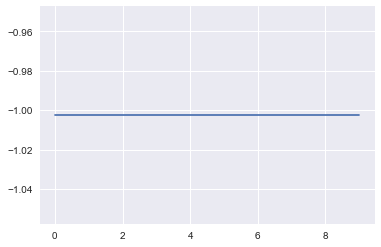

In [35]:
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

the r^2 is constant regardless the number of trees increases. 
The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [36]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.21364855822069112, 0.5283207896874222, 0.8050241165769842, -0.1625220110519754]


In [37]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.20494438330704987, 0.5209971854642338, 0.8205873730560311, -0.13051554225514272]


In [38]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.19657001207328179, 0.5187442983504277, 0.8349500136737713, -0.12075956934149312]


Feature importance is one of the key aspects of a machine learning model. Understanding which variable is contributing the most to a model is critical to interpreting the results. This is what data scientists strive for when building models that need to be explained to non-technical stakeholders.

Our dataset has multiple features and it is often difficult to understand which feature is dominant. This is where the feature importance function of random forest is so helpful. Let’s look at the top 10 most important features for our current model (including visualizing them by their importance):

Removing redundant features
So far, we’ve understood that having a high number of features can affect the performance of the model and also make it difficult to interpret the results. In this section, we will see how we can identify redundant features and remove them from the data.

We will use cluster analysis, more specifically hierarchical clustering, to identify similar variables. In this technique, we look at every object and identify which of them are the closest in terms of features. These variables are then replaced by their midpoint. To understand this better, let us have a look at the cluster plot for our dataset:

In [39]:
df_keep = data_new.copy()
df_keep['y'] = y
df_keep.head()


  Age Length_Of_Residence Member_Tenure_Years  Home_Owner_Home.Owner  ...  \
1  77                  15                  54                      1  ...   
2  68                  15                  13                      1  ...   
3  76                  15                  44                      1  ...   
4  70                  15                  49                      1  ...   
6  73                  15                  14                      1  ...   

   Credit_Ranges_Unknown  Children_No  Children_Yes  y  
1                      0            1             0  0  
2                      0            1             0  1  
3                      0            1             0  1  
4                      0            1             0  1  
6                      0            0             1  0  

[5 rows x 30 columns]

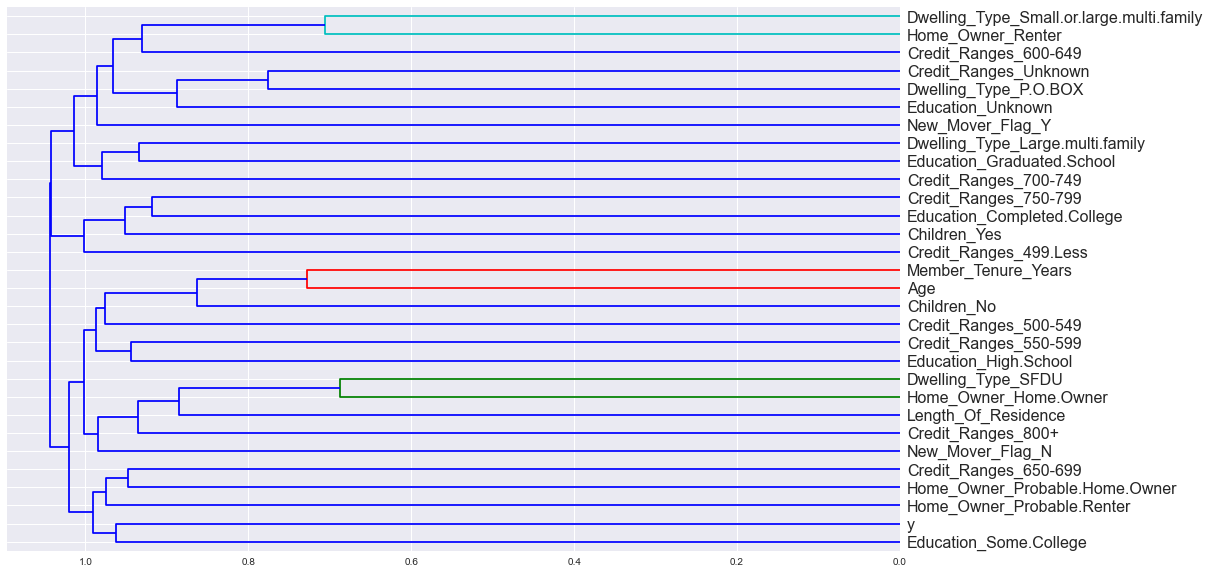

In [40]:
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns,
    orientation='left', leaf_font_size=16)
plt.show()

From the above dendrogram plot, we can see that the Home_Owner and Dwelling_Type are very similar to each other and tend to represent the same thing. Similarly, Age and Member_Tenure_Years are highly correlated. We will remove each of these features one by one and see how it affects the model performance.

Once these variables are removed from the original dataframe, the model’s score turns out to be ?0.907 on the validation set.

It is evident from the tables above that the mean value of these three variables is significantly different. We will drop these variables, fit the random forest again and check the feature importance:

Although these variables are obviously time dependent, they can also be important for making the predictions. Before we drop these variables, we need to check how they affect the OOB score. The initial OOB score in a sample is calculated for comparison:

Looking at the results, age, MachineID and SaleDayofYear actually improved the score while others did not. So, we will remove the remaining variables and fit the random forest on the complete dataset.

After removing the time dependent variables, the validation score (0.915) is now better than the OOB score (0.909). We can now play around with other parameters like n_estimator on max_features. To create the final model, Jeremy increased the number of trees to 160 and here are the results:

Train-validation-test: It is important to have a validation set to check the performance of the model before we use it on the test set. It often happens that we end up overfitting our model on the validation set. And if the validation set is not a true representative of the test set, then the model will fail as well. So the complete data should be split into train, validation and test set, where the test set should only be used at the end (and not during parameter tuning).

In [41]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3219 entries, 0 to 3218
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Household_Key              3219 non-null   object
 1   Individual_Key             3219 non-null   object
 2   City                       3219 non-null   object
 3   State_Grouped              3219 non-null   object
 4   ZIP5                       3219 non-null   object
 5   ZIP9                       3219 non-null   object
 6   FSV_CMSI_Flag              3219 non-null   object
 7   FSV_Credit_Card_Flag       3219 non-null   object
 8   FSV_Deposit_Program_Flag   3219 non-null   object
 9   FSV_Home_Equity_Flag       3219 non-null   object
 10  FSV_ID_Theft_Flag          3219 non-null   object
 11  FSV_Mortgage_Flag          3219 non-null   object
 12  INS_Client_Flag            3219 non-null   object
 13  TRV_Globalware_Flag        3219 non-null   object
 14  Number_o

In [42]:
def pandas_df_to_markdown_table(df):
    from IPython.display import Markdown, display
    
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

pandas_df_to_markdown_table(df_test)

NameError: name 'df_test' is not defined